In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import base64
from glob import glob
import cv2

In [10]:
for dirname, _, filenames in os.walk('./eliva-25-image-restoration/data25'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./eliva-25-image-restoration/data25\img1.jpg
./eliva-25-image-restoration/data25\img10.jpg
./eliva-25-image-restoration/data25\img11.jpg
./eliva-25-image-restoration/data25\img12.jpg
./eliva-25-image-restoration/data25\img13.jpg
./eliva-25-image-restoration/data25\img14.jpg
./eliva-25-image-restoration/data25\img15.jpg
./eliva-25-image-restoration/data25\img2.jpg
./eliva-25-image-restoration/data25\img3.jpg
./eliva-25-image-restoration/data25\img4.jpg
./eliva-25-image-restoration/data25\img5.jpg
./eliva-25-image-restoration/data25\img6.jpg
./eliva-25-image-restoration/data25\img7.jpg
./eliva-25-image-restoration/data25\img8.jpg
./eliva-25-image-restoration/data25\img9.jpg
./eliva-25-image-restoration/data25\test.csv
./eliva-25-image-restoration/data25\train.csv


PSF shape: (512, 512, 3)
Tipo immagine: uint8
Valori min/max: 0 255


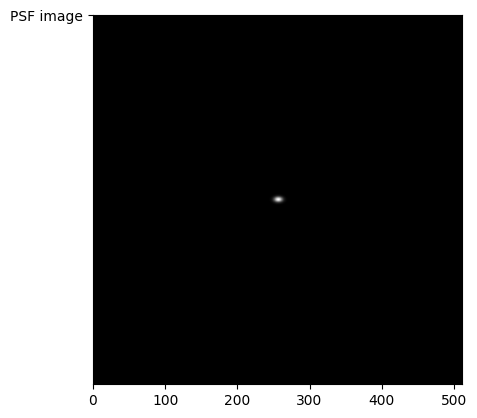

In [34]:
psf = cv2.imread('./eliva-25-image-restoration/PSF_image.png')

print(f"PSF shape: {psf.shape}")
print("Tipo immagine:", psf.dtype)
print("Valori min/max:", psf.min(), psf.max())

plt.figure()
plt.imshow(psf)
plt.plot('PSF image')

In [51]:
def restore(img, psf, eps=1e-3):
    # Verifica formato corretto
    assert img.ndim == 3 and img.shape[2] == 3, "Immagine non RGB"
    assert psf.ndim == 3 and psf.shape[2] == 3, "PSF non RGB"

    # Prepara output
    channels_restored = []

    # Per ogni canale (B, G, R)
    for c in range(3):
        img_c = img[:, :, c].astype(np.float32) / 255.0
        psf_c = psf[:, :, c].astype(np.float32)
        psf_c /= np.sum(psf_c) + 1e-8  # normalizza per evitare divisione per zero

        # Fourier transform
        G = np.fft.fft2(img_c)
        psf_c_shifted = np.fft.ifftshift(psf_c)

        """plt.figure()
        plt.imshow(psf_c_shifted)
        plt.plot('PSF image shifted')"""

        H = np.fft.fft2(psf_c_shifted)

        # Inverse filter con stabilizzazione
        # Inverse filtering (evitiamo divisione per zero)
        H_conj = np.conj(H)
        H_abs2 = np.abs(H)**2
        F_hat = G * H_conj / (H_abs2 + eps)
        img_restored = np.fft.ifft2(F_hat).real

        # Clip e conversione
        img_restored = np.clip(img_restored, 0, 1)
        img_restored = (img_restored * 255).astype(np.uint8)

        channels_restored.append(img_restored)

    # Ricombina i 3 canali (cv2 usa BGR)
    restored_color = cv2.merge(channels_restored)
    return restored_color


test img shape: (512, 512, 3)
Tipo immagine: uint8
Valori min/max: 12 246


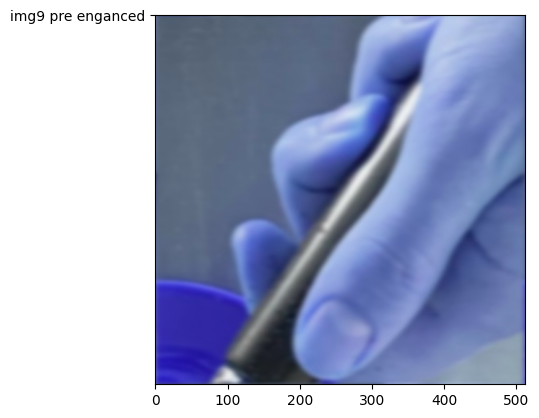

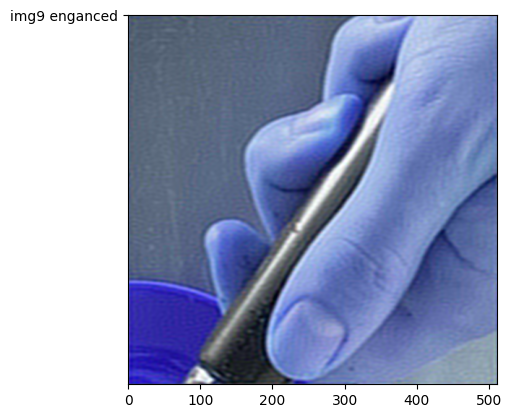

In [62]:
test_image = cv2.imread('./eliva-25-image-restoration/data25\img13.jpg')

print(f"test img shape: {test_image.shape}")
print("Tipo immagine:", test_image.dtype)
print("Valori min/max:", test_image.min(), test_image.max())

plt.figure()
plt.imshow(test_image)
plt.plot('img9 pre enganced')

enhanced = restore(test_image, psf)

plt.figure()
plt.imshow(enhanced)
plt.plot('img9 enganced')